# Первая часть задания - предобработка другого [датасета](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)

в архиве 4 файла с похожими датасета, отличаются сложность предобработки (больше признаков, столбцов) и кол-вом строк, выбрал самый сложный на мой взгляд датасет.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [32]:
df = pd.read_csv('https://drive.google.com/uc?id=17qBgxWuH-lgDuLrr3ih1BmIrW1rE3Cpv')
df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [33]:
print(df.shape)
print(df.dtypes)

(8128, 13)
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object


In [34]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [35]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## Предобработка


In [36]:
df.dropna(inplace=True)
df = df.drop_duplicates()
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


только в одном месте сделал нормирование, т.к. для линейной регрессии она особо не нужна, просто показать и такую вещь:)


In [37]:
df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min()) # нормирование соот.
mapping0 = {value: index for index, value in enumerate(df['fuel'].unique())}
df['fuel'] = df['fuel'].map(mapping0)
mapping1 = {value: index for index, value in enumerate(df['seller_type'].unique())}
df['seller_type'] = df['seller_type'].map(mapping1)
mapping2 = {value: index for index, value in enumerate(df['transmission'].unique())}
df['transmission'] = df['transmission'].map(mapping2)

<ipython-input-37-2b9f7f45b34f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min()) # нормирование соот.
<ipython-input-37-2b9f7f45b34f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel'] = df['fuel'].map(mapping0)
<ipython-input-37-2b9f7f45b34f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [38]:
owner_mapping = {'First': 1,
                'Second': 2,
                'Third': 3,
                'Fourth': 4}
def replace_owner(owner):
    for key, value in owner_mapping.items():
        if key in owner:
            return value
    return None
df['owner'] = df['owner'].apply(replace_owner)

<ipython-input-38-82af2869ba31>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner'] = df['owner'].apply(replace_owner)


In [39]:
def first_part(mileage):
    return str(mileage).split()[0]
name = df['name']
df['name'] = df['name'].apply(first_part)
mapping4 = {value: index for index, value in enumerate(df['name'].unique())}
df['name'] = df['name'].map(mapping4)
df['mileage'] = df['mileage'].apply(first_part).astype(float)
df['engine'] = df['engine'].apply(first_part).astype(float)
df['max_power'] = df['max_power'].apply(first_part).astype(float)
df = df.drop(['torque'], axis = 1)


df

<ipython-input-39-10f9729abc2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].apply(first_part)
<ipython-input-39-10f9729abc2c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].map(mapping4)
<ipython-input-39-10f9729abc2c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,0.769231,450000,145500,0,0,0,1.0,23.40,1248.0,74.00,5.0
1,1,0.769231,370000,120000,0,0,0,2.0,21.14,1498.0,103.52,5.0
2,2,0.461538,158000,140000,1,0,0,3.0,17.70,1497.0,78.00,5.0
3,3,0.615385,225000,127000,0,0,0,1.0,23.00,1396.0,90.00,5.0
4,0,0.500000,130000,120000,1,0,0,1.0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,0,0.730769,260000,50000,1,0,0,2.0,18.90,998.0,67.10,5.0
8122,3,0.769231,475000,80000,0,0,0,2.0,22.54,1396.0,88.73,5.0
8123,3,0.730769,320000,110000,1,0,0,1.0,18.50,1197.0,82.85,5.0
8124,3,0.500000,135000,119000,0,0,0,4.0,16.80,1493.0,110.00,5.0


здесь была попытка разбить столбец torque на два других с двумя соот. значениями, но моя реализация не совсем получилась из-за того, что в ячейке столбца может существовать 3 слова (реализовано только для 2х), пробелы в случайных местах, поэтому я отбросил этот признак (1 ячейка ниже просто существует)

In [40]:
#def first_numb(parts):
    #for i in range(len(parts) - 1, -1, -1):
        #if parts[i].isdigit() != 1:
            #continue
        #else:
            #return parts[0:i + 1]

# Создаем функцию для обработки значений в ячейке
#def process_torque(torque):
    # Разделяем строку на части по пробелу
    #parts = torque.split()

    #first_num = first_numb(parts[0])
    # Извлекаем второе число или вычисляем среднее, если есть диапазон
    #if '-' in parts[1]:
        #parts = first_numb(parts[1])
        #num1, num2 = parts.split('-')
        #second_num = (int(num1) + int(num2)) / 2
    #else:
        #second_num = first_numb(parts[1])

    #return first_num, second_num
# Применяем функцию для обработки значений в колонке 'torque'
#df[['torque1', 'torque2']] = df['torque'].apply(process_torque)
#df

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   int64  
 1   year           6717 non-null   float64
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   int64  
 5   seller_type    6717 non-null   int64  
 6   transmission   6717 non-null   int64  
 7   owner          6712 non-null   float64
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 682.2 KB


In [42]:
df.dropna(inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,0.769231,450000,145500,0,0,0,1.0,23.40,1248.0,74.00,5.0
1,1,0.769231,370000,120000,0,0,0,2.0,21.14,1498.0,103.52,5.0
2,2,0.461538,158000,140000,1,0,0,3.0,17.70,1497.0,78.00,5.0
3,3,0.615385,225000,127000,0,0,0,1.0,23.00,1396.0,90.00,5.0
4,0,0.500000,130000,120000,1,0,0,1.0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,0,0.730769,260000,50000,1,0,0,2.0,18.90,998.0,67.10,5.0
8122,3,0.769231,475000,80000,0,0,0,2.0,22.54,1396.0,88.73,5.0
8123,3,0.730769,320000,110000,1,0,0,1.0,18.50,1197.0,82.85,5.0
8124,3,0.500000,135000,119000,0,0,0,4.0,16.80,1493.0,110.00,5.0


## Линейная регрессия

In [43]:
Y = df['selling_price']
X = df.drop(['selling_price'], axis = 1)
X['abs term'] = [1 for i in range(len(df))]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,abs term
2945,2,0.730769,32000,1,0,0,1.0,16.80,1497.0,116.30,5.0,1
7240,0,0.961538,7200,1,0,0,1.0,21.10,998.0,100.50,5.0,1
4468,0,0.653846,80000,1,0,0,3.0,15.50,1586.0,103.30,5.0,1
7735,0,0.538462,29000,1,0,0,1.0,16.10,796.0,37.00,4.0,1
6070,2,0.730769,80000,1,0,0,2.0,16.80,1497.0,116.30,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7222,0,0.923077,51000,0,0,0,1.0,25.10,1248.0,88.50,5.0,1
82,16,0.846154,30000,1,0,1,2.0,15.71,1998.0,189.00,5.0,1
4660,8,0.730769,70000,0,0,0,2.0,19.40,1405.0,70.00,5.0,1
7146,2,0.923077,40000,0,0,0,1.0,25.80,1498.0,98.60,5.0,1


In [44]:
A = X_train.values
A = np.matrix(A)
A_plus = np.linalg.inv((A.T @ A)) @ A.T
print('Псевдообратная матрица:\n', A_plus, '\n')
X = A_plus @ Y_train
print('Коэффициенты линейной регресии:\n', X)

Псевдообратная матрица:
 [[-3.23273941e-05 -3.76545696e-05 -5.20528195e-05 ...  3.00421891e-05
  -2.72307334e-05 -9.69178896e-06]
 [-8.48939690e-04  1.76100675e-03  1.12895797e-03 ...  9.55549218e-04
   3.51391260e-04  1.04750610e-03]
 [-2.20133564e-09 -1.12922080e-09 -6.96533161e-10 ... -1.10731813e-09
  -1.51916571e-09 -4.72224598e-10]
 ...
 [ 1.17594754e-05  1.32478859e-05  4.04993595e-06 ... -9.62974518e-06
   2.11342457e-06 -2.89162858e-06]
 [-1.53860262e-04  6.58650011e-05 -3.00964839e-04 ... -2.74553474e-04
  -1.63928767e-04 -8.51609378e-05]
 [ 1.75881761e-03 -1.95895867e-04 -2.25223363e-05 ...  2.49806420e-03
  -1.67953677e-03 -9.20711903e-05]] 

Коэффициенты линейной регресии:
 [ 5.61378673e+02  8.39479201e+05 -5.68524717e-01 -2.77266384e+04
  8.57634639e+04  2.82607689e+05 -2.60872317e+04  9.30827120e+03
  1.09185448e+02  8.57298703e+03 -3.83166399e+03 -1.11926790e+06]


In [45]:
pred = X_test @ X.T
compare = pd.DataFrame({'fare':Y_test,'predictions':pred})
compare

,fare,predictions
4977,360000,446675.960695
6922,610000,634111.754303
599,500000,522722.429076
124,350000,469468.653061
3546,150000,535252.759465
...,...,...
5169,525000,906522.782592
345,1090000,927228.068513
3137,730000,504798.562822
5721,210000,391143.992732


In [46]:
print('MAE = ', mean_absolute_error(Y_test,pred))
print('MSE = ', mean_squared_error(Y_test,pred))

MAE =  170520.6674453914
MSE =  88839729037.48782


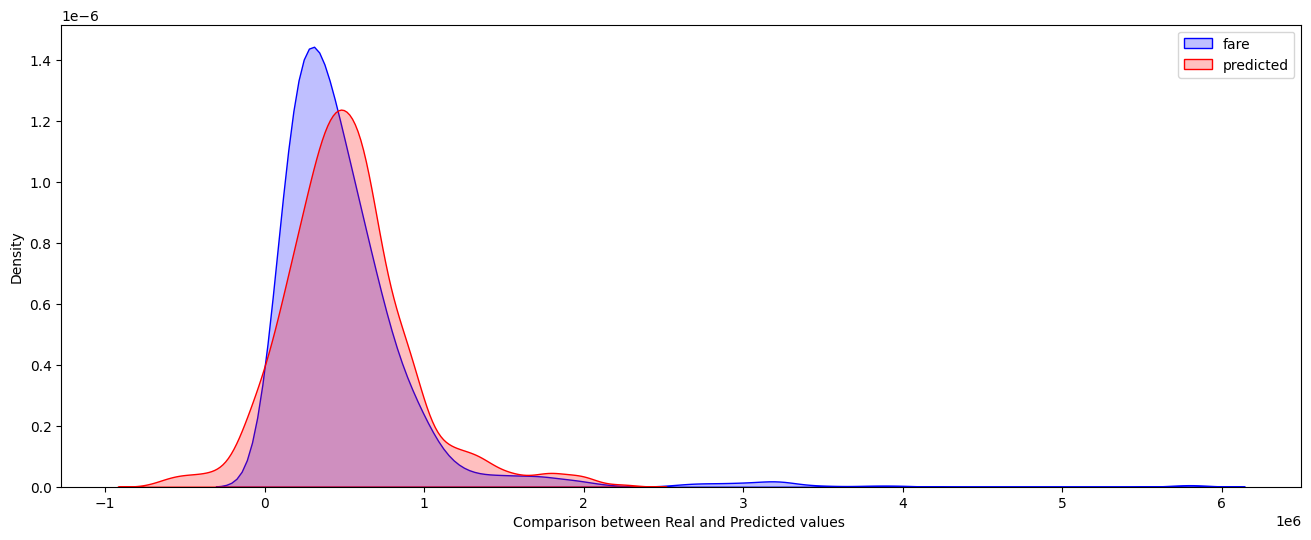

In [47]:
plt.figure(figsize=(16, 6))
plt.xlabel('Comparison between Real and Predicted values ')
sns.kdeplot(compare['fare'], fill=True, color='blue')
sns.kdeplot(compare['predictions'], color='red', fill=True)
plt.legend(labels = ['fare','predicted'])
plt.show()

# Вторая часть - полная реализация предсказания цен на такси [(датасет)](https://www.kaggle.com/datasets/raviiloveyou/predict-taxi-fare-with-a-bigquery-ml-forecasting) при помощи линейной регрессии и псевдообратной матрицы

In [48]:
# т.к. датасет был уже разделен, а нас это не устраивает, то склеим два датасета
df = pd.read_csv('https://drive.google.com/uc?id=1LGVvuaeCq10xqn2xyKELooSiYKrYg2hW')
dff = pd.read_csv('https://drive.google.com/uc?id=1adTgj6Yh8eHvMgj5i3DZNE3i2v5b5CUl')
df = pd.concat([df, dff])
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
89856,435.0,2.24,1.0,0.00,13,13.700,0.000,0
89857,519.0,2.61,1.0,0.00,7,13.850,0.000,0
89858,450.0,2.24,1.0,0.00,0,26.625,0.000,1
89859,919.0,4.12,1.0,0.00,25,30.200,0.000,1


In [49]:
print(df.shape)
print(df.dtypes)

(299534, 8)
trip_duration         float64
distance_traveled     float64
num_of_passengers     float64
fare                  float64
tip                     int64
miscellaneous_fees    float64
total_fare            float64
surge_applied           int64
dtype: object


## Предобработка

In [50]:
df = df.drop_duplicates() # убрали дубликаты
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
89856,435.0,2.24,1.0,0.00,13,13.700,0.000,0
89857,519.0,2.61,1.0,0.00,7,13.850,0.000,0
89858,450.0,2.24,1.0,0.00,0,26.625,0.000,1
89859,919.0,4.12,1.0,0.00,25,30.200,0.000,1


In [51]:
selected_columns = ['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'total_fare']
df = df[(df[selected_columns] > 0).all(axis=1)] # убрали нули, где они быть не могут
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [52]:
df = df[~((df['trip_duration'] > 36000) & (df['distance_traveled'] < 10))]
df = df[(df['trip_duration'] < 72000)]
df = df[(df['distance_traveled'] < 1000)]
df = df[(df['tip'] < 500)]
# df = df[(df['num_of_passengers'] < 5)]

df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


X - DataFrame с замененным столбцом, который мы хотим предсказать, на столбец, который в будущем будет отвечать за свободный коэфициент линейной регрессии

Y - столбец, который мы хотим предсказать

In [53]:
Y = df['total_fare']
X = df.drop(['total_fare', 'fare'], axis = 1)
X['abs term'] = [1 for i in range(len(df))]
X

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied,abs term
0,748.0,2.75,1.0,24,6.300,0,1
1,1187.0,3.43,1.0,24,13.200,0,1
2,730.0,3.12,1.0,0,26.625,1,1
3,671.0,5.63,3.0,0,9.750,0,1
4,329.0,2.09,1.0,12,13.200,0,1
...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,47,5.800,0,1
209669,438.0,1.29,1.0,12,34.575,1,1
209670,571.0,2.82,1.0,0,6.000,0,1
209671,491.0,2.16,1.0,0,13.500,0,1


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
X_train

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied,abs term
184505,674.0,3.23,1.0,22,33.950,1,1
200373,1227.0,4.43,1.0,37,13.175,0,1
11871,806.0,4.39,1.0,28,26.825,1,1
84434,1135.0,5.38,1.0,27,26.700,1,1
108934,1318.0,3.73,1.0,0,26.625,1,1
...,...,...,...,...,...,...,...
199956,984.0,6.57,1.0,0,6.000,0,1
66669,291.0,0.84,1.0,4,6.350,0,1
78994,329.0,1.38,1.0,0,6.000,0,1
56950,326.0,0.55,1.0,9,5.700,0,1


In [55]:
A = X_train.values
A = np.matrix(A)
A_plus = np.linalg.inv((A.T @ A)) @ A.T
print('Псевдообратная матрица:\n', A_plus, '\n')
X = A_plus @ Y_train
print('Коэффициенты линейной регресии:\n', X)

Псевдообратная матрица:
 [[-4.55153474e-10  2.42245281e-09 -6.57023751e-10 ... -1.02155600e-09
  -4.23021189e-10  1.53765572e-09]
 [-1.14721684e-06 -1.03161624e-06 -4.88966380e-07 ... -3.68168687e-07
  -8.79377115e-07 -1.12411639e-06]
 [-2.14692673e-06 -2.10387298e-06 -2.11876400e-06 ... -2.07853148e-06
  -2.06910525e-06 -2.10787145e-06]
 ...
 [ 5.76021303e-07  1.66283588e-07 -2.08368351e-07 ... -1.15583240e-07
  -1.54621766e-07  4.64465347e-07]
 [ 1.16287746e-05 -1.68701429e-05  2.44102008e-05 ... -3.74833970e-06
  -4.56338374e-06 -1.81703818e-05]
 [ 1.92859853e-06  6.21238428e-06  5.15913928e-06 ...  1.63135340e-05
   1.60892978e-05  8.52880321e-06]] 

Коэффициенты линейной регресии:
 [1.09047163e-02 1.29947370e+01 4.59334976e-01 1.26498435e+00
 5.61779979e-01 4.79436307e+00 2.91278769e+01]


In [56]:
pred = X_test @ X.T
compare = pd.DataFrame({'fare':Y_test,'predictions':pred})
compare

,fare,predictions
194610,176.625,172.832627
24261,133.200,135.872568
90569,66.000,67.331268
41284,110.700,107.103888
89898,85.950,93.520038
...,...,...
68681,79.200,85.739489
193577,118.500,126.788112
22658,96.000,92.379570
172973,54.750,63.483728


In [57]:
print('MAE = ', mean_absolute_error(Y_test,pred))
print('MSE = ', mean_squared_error(Y_test,pred))

MAE =  14.025147580160665
MSE =  1528.7198330976007


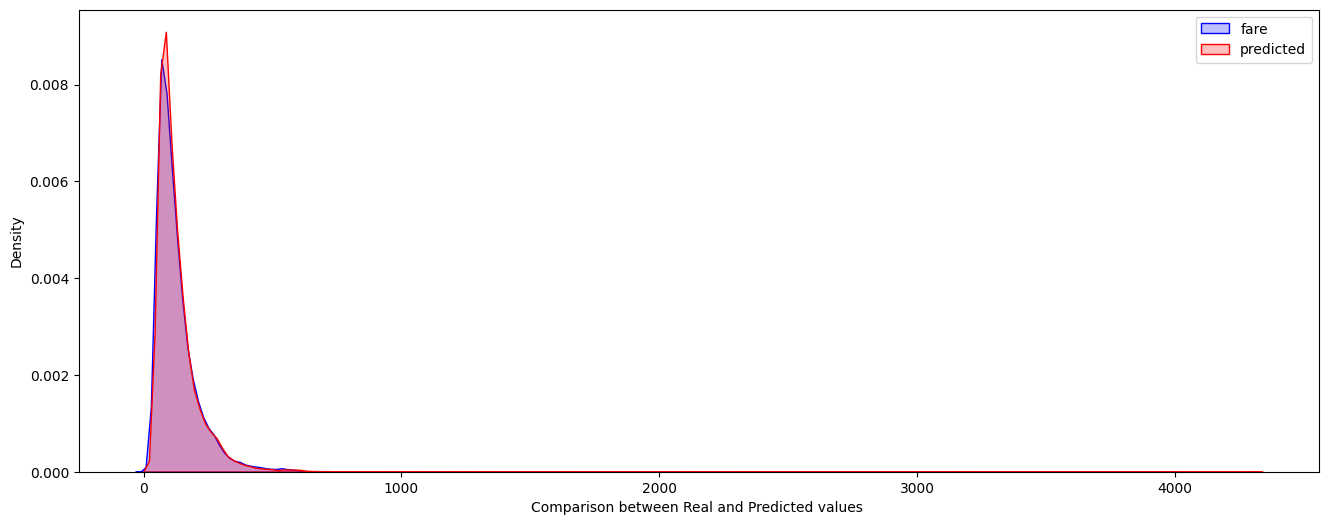

In [58]:
plt.figure(figsize=(16, 6))
plt.xlabel('Comparison between Real and Predicted values ')
sns.kdeplot(compare['fare'], fill=True, color='blue')
sns.kdeplot(compare['predictions'], color='red', fill=True)
plt.legend(labels = ['fare','predicted'])
plt.show()

In [59]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)
compare = pd.DataFrame({'Performance Index':Y_test,'Predictions':pred})
compare

,Performance Index,Predictions
194610,176.625,172.832627
24261,133.200,135.872568
90569,66.000,67.331268
41284,110.700,107.103888
89898,85.950,93.520038
...,...,...
68681,79.200,85.739489
193577,118.500,126.788112
22658,96.000,92.379570
172973,54.750,63.483728


In [60]:
print('MAE = ', mean_absolute_error(Y_test,pred))
print('MSE = ', mean_squared_error(Y_test,pred))

MAE =  14.025147580160658
MSE =  1528.719833097602


Сошлось с готовй Lr ура!
